Data 620 Web Analytics

Final Project



Said Naqwe

Eddie Xu

Mohamed Hassan-El Serafi



**Introduction**

We’re excited to present our group’s project, where we’re building a sentiment analysis model to classify tweets about major airlines (e.g., Virgin America, American) as positive, negative, or neutral, using a dataset of ~3,000 tweets from X. By analyzing tweet text and metadata, we aim to uncover public sentiment trends and explore social influence through network analysis of user-airline interactions. This project demonstrates our skills in text mining, machine learning, and graph analysis.

**Analysis Overview**

**Loading the Dataset:**
Import libraries (Pandas, Scikit-learn, NLTK, NetworkX) and load the X.csv dataset, containing tweets about airlines with pre-labeled sentiments, text, and metadata like retweet counts.  

**Data Preprocessing:**
Clean tweet text by removing URLs, mentions, and stopwords, handle missing values (e.g., negativereason), remove redundant columns (e.g., airline_sentiment_gold), and split data into 75% training and 25% testing sets.  

**Visualizing Sentiment Distribution:**
Create bar plots to count sentiments (positive, negative, neutral) for each airline using Seaborn, highlighting trends like Virgin America’s positive lean.  

**Word Cloud Visualization:**
Generate word clouds for positive and negative tweets to identify frequent terms (e.g., “great” vs. “delay”) using the wordcloud library.  

Analyzing Negative Reasons:
Summarize and visualize reasons for negative sentiments (e.g., Customer Service Issue, Late Flight) with bar plots, based on the negativereason column.  

**Predicting Sentiments: **
Train classifiers (Support Vector Classifier, Random Forest, Naive Bayes) using Scikit-learn pipelines, similar to our SMS project, to predict sentiments from tweet text.  

**Evaluating Model Performance: **
Calculate accuracy, precision, recall, and F1-scores, and display confusion matrix heatmaps to assess model effectiveness.  

**Building Network Graph: **
Construct a directed graph with NetworkX, where nodes are users and airlines, and edges represent retweets, colored by sentiment, to analyze influence patterns.  

**Conclusion: **
Summarize sentiment trends, model performance, and network insights, linking to applications like improving airline customer service, with suggestions for future enhancements.



# Sentiment Analysis

## Libraries

In [76]:
#Import Libraries
import nltk
nltk.download('stopwords')
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import re
import nltk
import random
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import networkx as nx
from networkx.algorithms import bipartite
from networkx.drawing.layout import bipartite_layout
from community import community_louvain
import matplotlib.cm as cm
import networkx.algorithms.community as nx_comm

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/eddiexuexia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
Tweet = pd.read_csv("https://raw.githubusercontent.com/moham6839/Data_620_Final_Project/refs/heads/main/X.csv")

In [4]:
Tweet.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [5]:
Tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

**Data Preprocessing**

We’ll clean the dataset by identifying and handling null or NA values, such as filling missing negativereason entries with “None” for non-negative tweets. We’ll remove redundant columns like airline_sentiment_gold and tweet_coord to streamline the data. Tweet text will be processed by removing URLs, mentions, punctuation, and stopwords using NLTK, followed by tokenization and conversion to lowercase. We’ll also count the number of positive, negative, and neutral tweets per airline to understand sentiment distribution. Finally, we’ll split the data into 75% training and 25% testing sets for model training



In [6]:
print("Percentage null or na values in df")
((Tweet.isnull() | Tweet.isna()).sum() * 100 / Tweet.index.size).round(2)

Percentage null or na values in df


tweet_id                         0.00
airline_sentiment                0.00
airline_sentiment_confidence     0.00
negativereason                  37.31
negativereason_confidence       28.13
airline                          0.00
airline_sentiment_gold          99.73
name                             0.00
negativereason_gold             99.78
retweet_count                    0.00
text                             0.00
tweet_coord                     93.04
tweet_created                    0.00
tweet_location                  32.33
user_timezone                   32.92
dtype: float64

In [7]:
#Removing the following column because of more than 90% having null data
del Tweet['tweet_coord']
del Tweet['airline_sentiment_gold']
del Tweet['negativereason_gold']

In [8]:
#Display Tweet Sentiment
Mood_count=Tweet['airline_sentiment'].value_counts()
print(Mood_count)

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64


**Sentiment of Each Airline**

We’ll calculate the total number of tweets for each airline (e.g., Virgin America, American) to understand their mention frequency. Using Seaborn, we’ll create bar plots to visualize the count of positive, negative, and neutral tweets per airline, revealing sentiment trends (e.g., Virgin America’s positive dominance). Additionally, we’ll explore airline-user relationships by constructing a directed network graph with NetworkX, where nodes represent users and airlines, and edges represent retweets, colored by sentiment, to highlight influence patterns



Total number of tweets for each airline 
  airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline_sentiment, dtype: int64


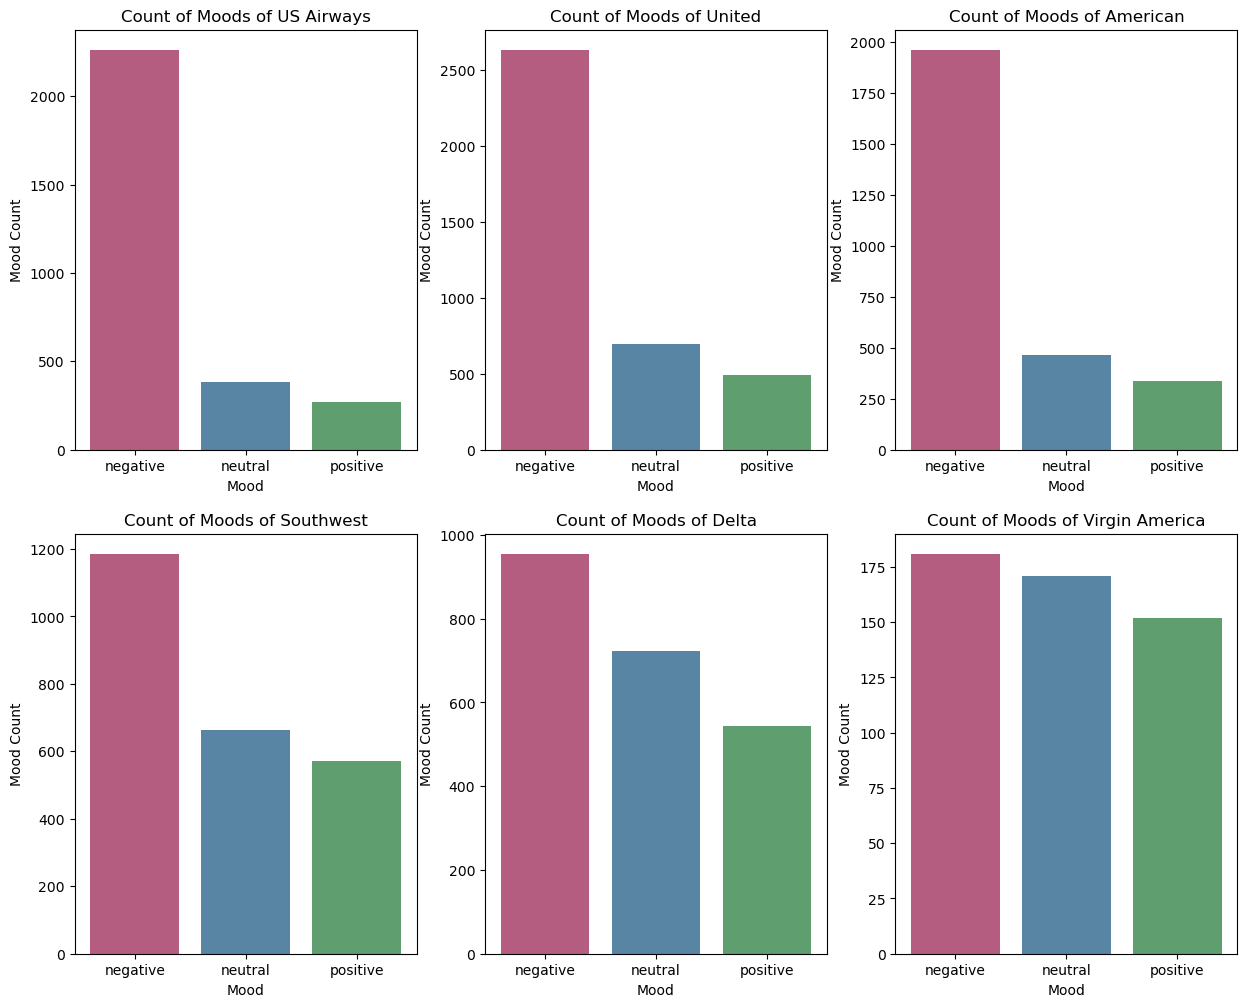

In [9]:
df = Tweet
print("Total number of tweets for each airline \n ",df.groupby('airline')['airline_sentiment'].count().sort_values(ascending=False))
airlines= ['US Airways','United','American','Southwest','Delta','Virgin America']
plt.figure(1,figsize=(15, 12))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    new_df=df[df['airline']==i]
    count=new_df['airline_sentiment'].value_counts()
    Index = [1,2,3]
    plt.bar(Index,count, color=['#b55d80', '#5985a4', '#5f9e6e'])
    plt.xticks(Index,['negative','neutral','positive'])
    plt.ylabel('Mood Count')
    plt.xlabel('Mood')
    plt.title('Count of Moods of '+i)

**Reasons for Negative Sentiment**

We’ll analyze the negativereason column in our dataset to identify the primary causes of negative sentiments in customer tweets about airlines. By counting and visualizing the frequency of reasons (e.g., Customer Service Issue, Late Flight) using bar plots with Seaborn, we’ll extract insights into common issues, such as frequent complaints about delays or poor service, to inform airline improvements.



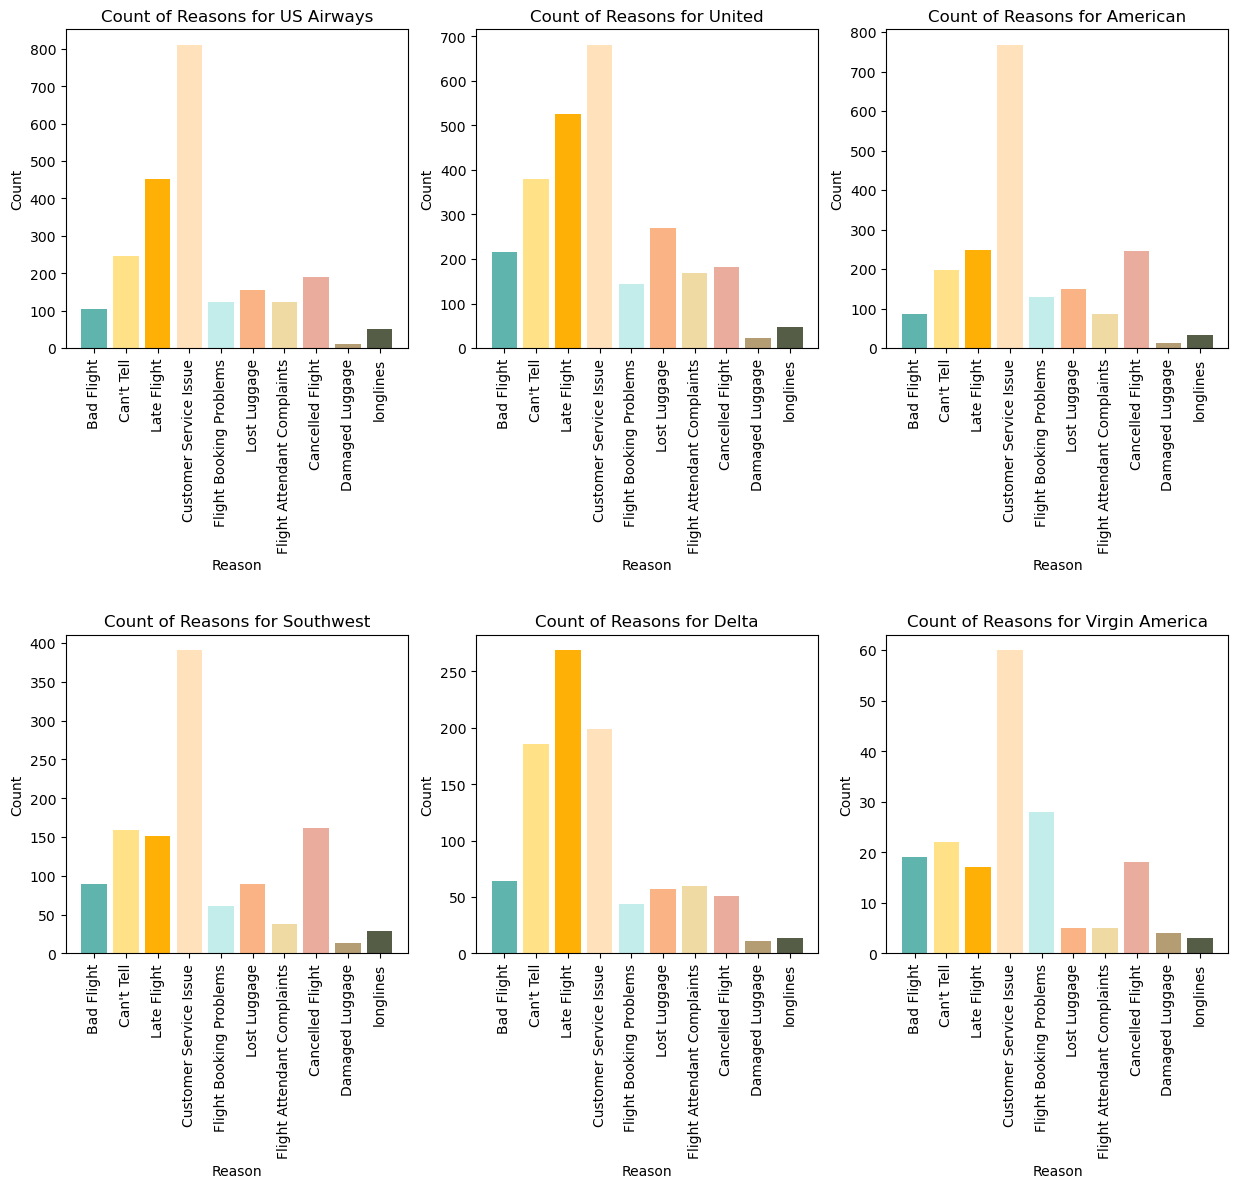

In [10]:
#get the number of negative reasons
df['negativereason'].nunique()

NR_Count=dict(df['negativereason'].value_counts(sort=False))
def NR_Count(Airline):
    if Airline=='All':
        a=df
    else:
        a=df[df['airline']==Airline]
    count=dict(a['negativereason'].value_counts())
    Unique_reason=list(df['negativereason'].unique())
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
    Reason_frame=pd.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame
def plot_reason(Airline):

    a=NR_Count(Airline)
    count=a['count']
    Index = range(1,(len(a)+1))
    plt.bar(Index,count, color=['#60b4ae','#ffe288','#ffb007','#ffe1bc','#c3edea','#f9b384','#f0daa4','#eaac9d','#b49c73','#565d47'])
    plt.xticks(Index,a['Reasons'],rotation=90)
    plt.ylabel('Count')
    plt.xlabel('Reason')
    plt.title('Count of Reasons for '+Airline)

plt.figure(2,figsize=(15, 12))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    plt.subplots_adjust(hspace=0.9)
    plot_reason(i)

**Negative Tweets**


We’ll use a word cloud to visualize the most frequent words in negative tweets about airlines, leveraging the wordcloud library. In the word cloud, larger words indicate higher frequency in the text, helping us identify common issues like “delay” or “service” that drive customer dissatisfaction. This visualization provides clear insights into the key themes behind negative sentiments, complementing our analysis of airline performance.



In [11]:
from wordcloud import WordCloud,STOPWORDS

In [12]:
df=Tweet[Tweet['airline_sentiment']=='negative']
words = ' '.join(df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('&')
                                and not word.startswith('wa')
                                and not word.startswith('now')
                                and word != 'RT'
                            ])

In [13]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',contour_width=1, contour_color='steelblue',
                      width=4000,
                      height=2500
                     ).generate(cleaned_word)

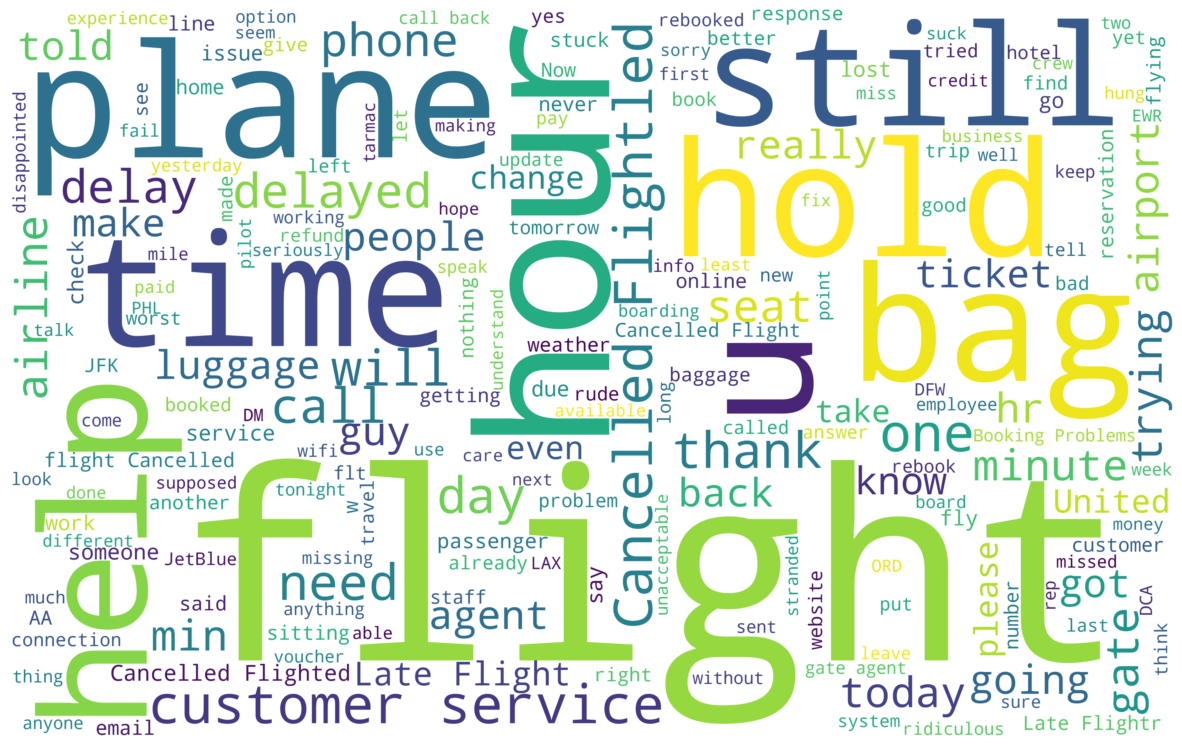

In [14]:
plt.figure(1,figsize=(15, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**Positive Tweets**

In [15]:
df=Tweet[Tweet['airline_sentiment']=='positive']
words = ' '.join(df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('&')
                                and word != 'RT'
                            ])

In [16]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',contour_width=1, contour_color='steelblue',
                      width=4000,
                      height=2500
                     ).generate(cleaned_word)

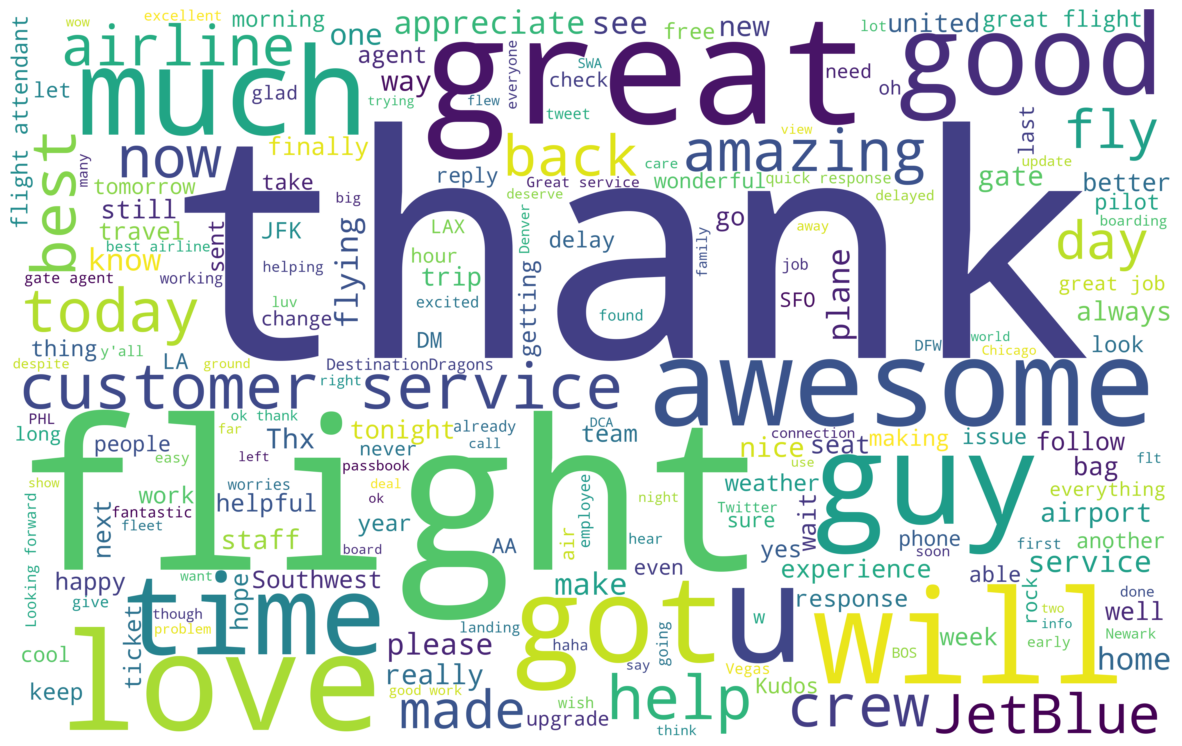

In [17]:
plt.figure(1,figsize=(15, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**Data Exploration - Model Classifier**

We’ll preprocess the tweet text data to optimize the learning process for our classifier models, ensuring accurate sentiment predictions. This involves cleaning the text by removing URLs, mentions, punctuation, and stopwords, tokenizing words, and converting to lowercase using NLTK. We’ll then apply classification algorithms—Support Vector Classifier, Random Forest, and Naive Bayes—via Scikit-learn pipelines to predict tweet sentiments (positive, negative, neutral), leveraging the cleaned text for robust performance.



In [18]:
def tweet_to_words(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet)
    words = letters_only.lower().split()
    stops = set(stopwords.words("english"))
    meaningful_words = [w for w in words if not w in stops]
    return( " ".join( meaningful_words ))

In [19]:
def clean_tweet_length(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet)
    words = letters_only.lower().split()
    stops = set(stopwords.words("english"))
    meaningful_words = [w for w in words if not w in stops]
    return(len(meaningful_words))

In [20]:
Tweet['sentiment']=Tweet['airline_sentiment'].apply(lambda x: 0 if x=='negative' else 1)

In [21]:
Tweet['clean_tweet']=Tweet['text'].apply(lambda x: tweet_to_words(x))
Tweet['Tweet_length']=Tweet['text'].apply(lambda x: clean_tweet_length(x))
train,test = train_test_split(Tweet,test_size=0.2,random_state=42)

In [22]:
train_clean_tweet=[]
for tweet in train['clean_tweet']:
    train_clean_tweet.append(tweet)
test_clean_tweet=[]
for tweet in test['clean_tweet']:
    test_clean_tweet.append(tweet)

**Predicting Sentiments from Tweet Text Data**

We’ll predict tweet sentiments (positive, negative, neutral) using the preprocessed text data from our airline tweets. We’ll apply the following classifier models through Scikit-learn pipelines: Logistic Regression, KNeighborsClassifier, Support Vector Classifier (SVC), DecisionTreeClassifier, RandomForestClassifier, AdaBoostClassifier, and Gaussian Naive Bayes. These models will leverage the cleaned tweet text to classify sentiments accurately, enabling us to compare their performance and identify the best approach for airline sentiment analysis.



In [23]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(analyzer = "word")
train_features= v.fit_transform(train_clean_tweet)
test_features=v.transform(test_clean_tweet)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [25]:
Classifiers = [
    LogisticRegression(C=0.000000001,solver='liblinear',max_iter=200),
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True,gamma='auto'),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200),
    AdaBoostClassifier(),
    GaussianNB()]

In [26]:
dense_features=train_features.toarray()
dense_test= test_features.toarray()
Accuracy=[]
Model=[]
for classifier in Classifiers:
    try:
        fit = classifier.fit(train_features,train['sentiment'])
        pred = fit.predict(test_features)
    except Exception:
        fit = classifier.fit(dense_features,train['sentiment'])
        pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test['sentiment'])
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)
    print('Accuracy of '+classifier.__class__.__name__+' is '+str(accuracy))

Accuracy of LogisticRegression is 0.6451502732240437
Accuracy of KNeighborsClassifier is 0.5891393442622951
Accuracy of SVC is 0.6451502732240437
Accuracy of DecisionTreeClassifier is 0.7592213114754098
Accuracy of RandomForestClassifier is 0.8131830601092896
Accuracy of AdaBoostClassifier is 0.7855191256830601
Accuracy of GaussianNB is 0.5724043715846995


**Compare the Model Performances**

We’ll evaluate the performance of our classifier models—Logistic Regression, KNeighborsClassifier, SVC, DecisionTreeClassifier, RandomForestClassifier, AdaBoostClassifier, and Gaussian Naive Bayes—in predicting tweet sentiments. Using Scikit-learn, we’ll compute accuracy, precision, recall, and F1-scores for each model and visualize their effectiveness with confusion matrix heatmaps. By comparing these metrics, we’ll identify the best-performing model for airline sentiment analysis, providing insights into which approach best captures customer sentiment trends.



Text(0.5, 1.0, 'Accuracies of Models')

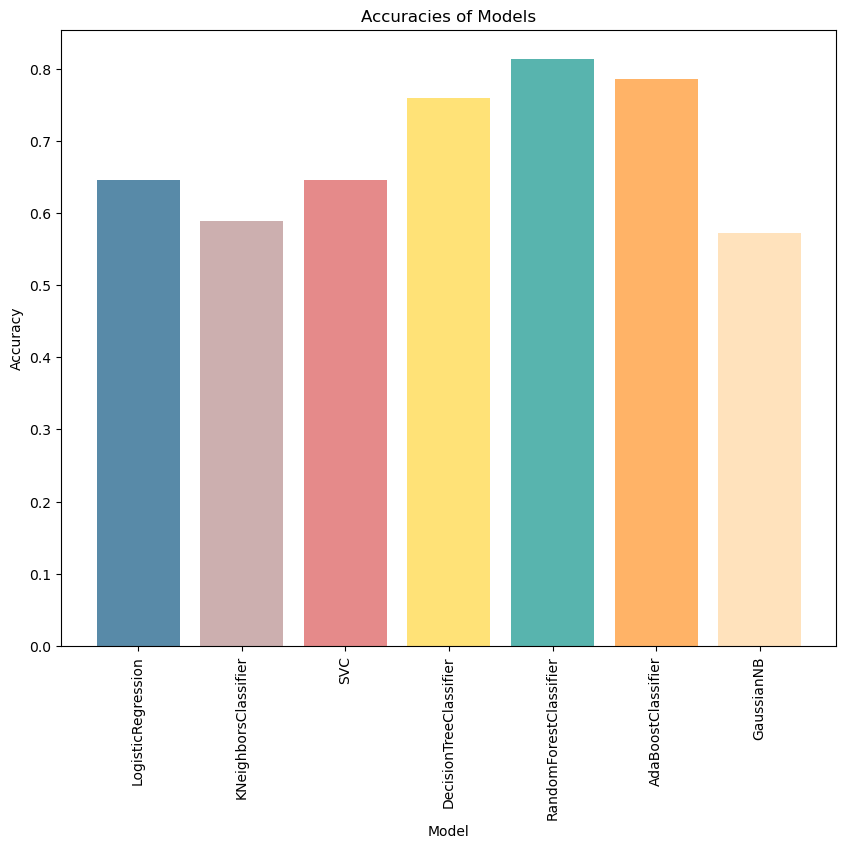

In [27]:
Index = [1,2,3,4,5,6,7]
plt.figure(5,figsize=(10, 8))
plt.bar(Index,Accuracy,color=['#588aa8', '#ccafaf', '#e58a8a','#ffe277', '#58b4ae', '#ffb367', '#ffe2bc'])
plt.xticks(Index, Model,rotation=90)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Accuracies of Models')

In [28]:
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
Classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200),
    AdaBoostClassifier()]

Random Forest Classifier gives us the best accuracy score, precision scores according to the classification report.

**Confusion Matrix**

In [29]:
dense_features=train_features.toarray()
dense_test= test_features.toarray()
Accuracy=[]
Model=[]
for classifier in Classifiers:
    try:
        fit = classifier.fit(train_features,train['airline_sentiment'])
        pred = fit.predict(test_features)
    except Exception:
        fit = classifier.fit(dense_features,train['airline_sentiment'])
        pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test['airline_sentiment'])
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)
    print('Accuracy of '+classifier.__class__.__name__+' is '+str(accuracy))
    print(classification_report(pred,test['airline_sentiment']))
    cf_matrix=confusion_matrix(pred , test['airline_sentiment'])
    #sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

Accuracy of DecisionTreeClassifier is 0.6834016393442623
              precision    recall  f1-score   support

    negative       0.79      0.80      0.79      1859
     neutral       0.45      0.41      0.43       641
    positive       0.56      0.60      0.57       428

    accuracy                           0.68      2928
   macro avg       0.60      0.60      0.60      2928
weighted avg       0.68      0.68      0.68      2928

Accuracy of RandomForestClassifier is 0.7653688524590164
              precision    recall  f1-score   support

    negative       0.90      0.81      0.86      2102
     neutral       0.45      0.57      0.50       454
    positive       0.59      0.73      0.65       372

    accuracy                           0.77      2928
   macro avg       0.65      0.71      0.67      2928
weighted avg       0.79      0.77      0.78      2928

Accuracy of AdaBoostClassifier is 0.733948087431694
              precision    recall  f1-score   support

    negative     

# Bipartite Network Analysis

In [58]:
# extract tweets based on bad customer service
tweet_clean = Tweet.dropna(subset = 'tweet_location')
tweet_clean = tweet_clean.dropna(subset='user_timezone')
late_flight = pd.DataFrame(tweet_clean[(tweet_clean['negativereason'] == 'Late Flight') & (tweet_clean['negativereason_confidence'] == 1)])
late_flight = late_flight[late_flight['Tweet_length'] > 10]

print(len(late_flight))

229


In [59]:
late_flight

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone,sentiment,clean_tweet,Tweet_length
210,569247394002563072,negative,1.0,Late Flight,1.0,Virgin America,wmrrock,0,@VirginAmerica flight 404 delayed 2 hours in L...,2015-02-21 13:28:49 -0800,CT,Eastern Time (US & Canada),0,virginamerica flight delayed hours la due mech...,16
608,570252666439385088,negative,1.0,Late Flight,1.0,United,RaquelSnyderDC,0,@United. What's going on with UA 236? outboun...,2015-02-24 08:03:25 -0800,"Washington, D.C. Metro Area",Eastern Time (US & Canada),0,united going ua outbound flight last thurs del...,13
694,570177593250582528,negative,1.0,Late Flight,1.0,United,Twist_OP,0,@United flight delayed-no one remembered to tu...,2015-02-24 03:05:06 -0800,Midwest,Central Time (US & Canada),0,united flight delayed one remembered turn heat...,11
762,570092599316389888,negative,1.0,Late Flight,1.0,United,CellucorJulio,0,@united 4 passengers after a 2 hour delayed fl...,2015-02-23 21:27:22 -0800,CORGaming@cellucor.com,Central Time (US & Canada),0,united passengers hour delayed flight left hot...,15
791,570079699595980802,negative,1.0,Late Flight,1.0,United,MelanieSpring,0,@united can you ask your guys with flight 1146...,2015-02-23 20:36:06 -0800,"Washington, DC",Eastern Time (US & Canada),0,united ask guys flight bwi wait us get delayed...,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14365,569626951733932032,negative,1.0,Late Flight,1.0,American,macario2,0,@AmericanAir we are waiting flight 919 !\nWe a...,2015-02-22 14:37:03 -0800,Pocos de Caldas,Brasilia,0,americanair waiting flight jfk h newyork virac...,12
14418,569618884577218560,negative,1.0,Late Flight,1.0,American,mattadams_,0,@AmericanAir two delayed flights today that we...,2015-02-22 14:04:59 -0800,"ÜT: 29.717516,-95.505488",Central Time (US & Canada),0,americanair two delayed flights today weather ...,11
14504,569605930146353152,negative,1.0,Late Flight,1.0,American,jddowsett,0,@AmericanAir many have missed connections alr...,2015-02-22 13:13:31 -0800,"PA, NY & HI",Quito,0,americanair many missed connections already b ...,12
14597,569593278636675072,negative,1.0,Late Flight,1.0,American,otisday,0,@AmericanAir @Stone9956 Do you dislike delays ...,2015-02-22 12:23:14 -0800,Pekin,Eastern Time (US & Canada),0,americanair stone dislike delays caused crew f...,16


In [60]:
# Create two node lists (users and airlines)
airline_node = pd.DataFrame(late_flight['airline'])
airline_node = airline_node.rename(columns={'airline': 'node'})
airline_node['type'] = 'airline'
airline_list = list(set(airline_node['node']))
print(airline_list)

['Southwest', 'Virgin America', 'American', 'Delta', 'United', 'US Airways']


In [61]:
user_node = pd.DataFrame(late_flight['name'])
user_node = user_node.rename(columns={'name': 'node'})
user_node['type'] = 'name'
user_list = list(user_node['node'])
print(len(user_list))

229


In [62]:
# create edge list between the users and airline
edge_full = late_flight[['airline','name']]

edge_list = list(zip(edge_full['airline'], edge_full['name']))
print(edge_list)

[('Virgin America', 'wmrrock'), ('United', 'RaquelSnyderDC'), ('United', 'Twist_OP'), ('United', 'CellucorJulio'), ('United', 'MelanieSpring'), ('United', 'jcbtdd'), ('United', 'hooton'), ('United', 'kennykhlee'), ('United', 'docmartin_10'), ('United', 'CowboyPharmD'), ('United', 'Natemaniac12'), ('United', 'ahpandya747'), ('United', 'DanaHFreeman'), ('United', 'alysabaker'), ('United', 'priyadarshy'), ('United', 'deltabrav0'), ('United', 'bobgiolito'), ('United', 'bobgiolito'), ('United', 'adamd703'), ('United', 'Andy_Pi'), ('United', 'reccewife'), ('United', 'reccewife'), ('United', 'CrowdSafetyNI'), ('United', 'nbhdsheila'), ('United', 'YelpPittsburgh'), ('United', 'AlyssaOMalley'), ('United', 'rmeyers_5'), ('United', 'LMSNaomi'), ('United', 'LMSNaomi'), ('United', 'newguymeltz'), ('United', 'bushth07'), ('United', 'traceyabbywhite'), ('United', 'apopnj01'), ('United', 'Randy_King_SF'), ('United', 'Angela_Saurine'), ('United', 'HPStorageGuy'), ('United', 'AndreaDurkee'), ('United', 

In [63]:
# create the bipartite graph
airline_bipart = nx.Graph()

# add nodes and edges
airline_bipart.add_nodes_from(airline_list, bipartite=0)
airline_bipart.add_nodes_from(user_list, bipartite=1)
airline_bipart.add_edges_from(edge_list)

# check if the graph is bipartite
print(bipartite.is_bipartite(airline_bipart))

bipartite_none = list()
# Examine the bipartite attribute of each node
for node, data in airline_bipart.nodes(data=True):
    if data.get('bipartite') == None:
        print(f"Node {node}: bipartite = {data.get('bipartite')}")
        bipartite_none.append(node)


True


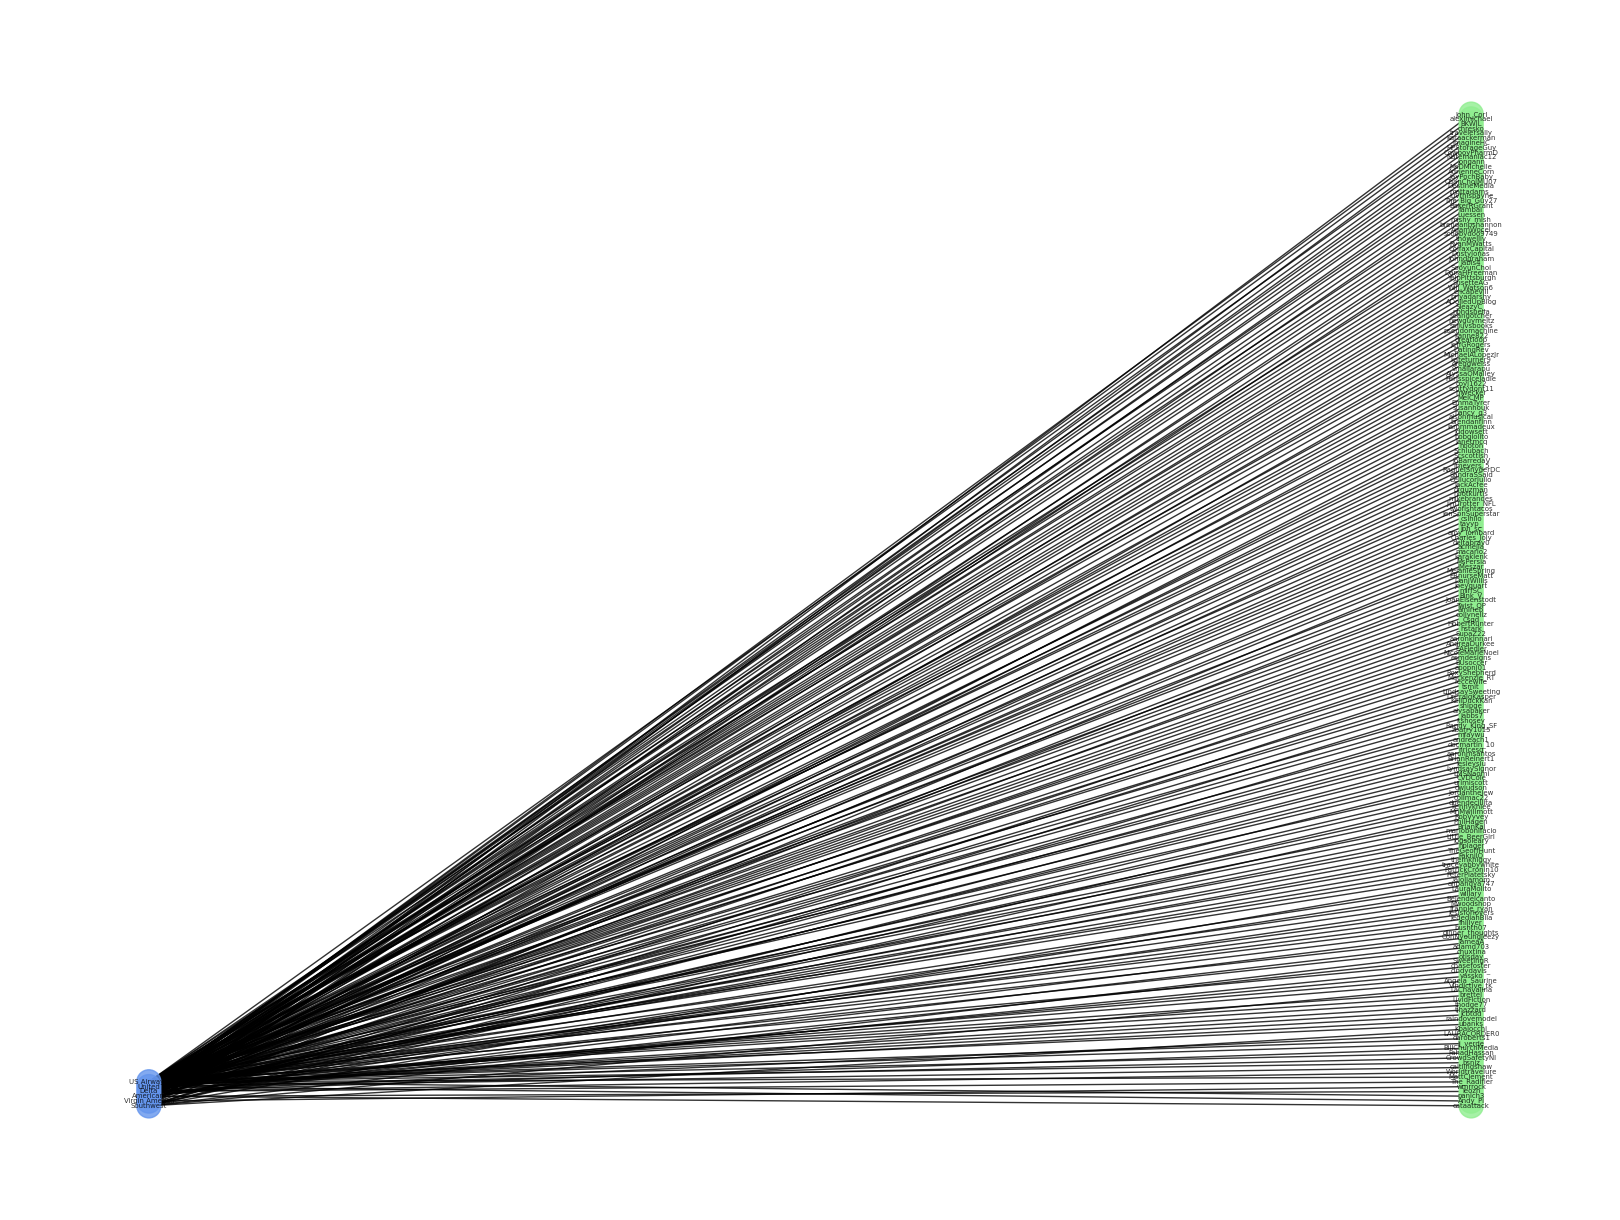

In [68]:
# remove nodes that have NONE bipartite
airline_bipart.remove_nodes_from(bipartite_none)

# separate nodes
top_nodes_subset = {n for n, d in airline_bipart.nodes(data=True) if d['bipartite'] == 0}
bottom_nodes_subset = {n for n, d in airline_bipart.nodes(data=True) if d['bipartite'] == 1}
airline_bipart.nodes(data=True)

# set node colors
color_dict = {0:'cornflowerblue', 1:'lightgreen'}
color_list = [color_dict[i[1]] for i in airline_bipart.nodes.data('bipartite')]

# draw a bipartite graph
pos = dict()
color = []

pos.update((n, (1, i)) for i, n in enumerate(top_nodes_subset))
pos.update((n, (2, i)) for i, n in enumerate(bottom_nodes_subset))

plt.figure(figsize=(16, 12))
nx.draw(airline_bipart, pos=pos, with_labels=True, node_color=color_list, font_size=5, alpha=0.8)
plt.show()

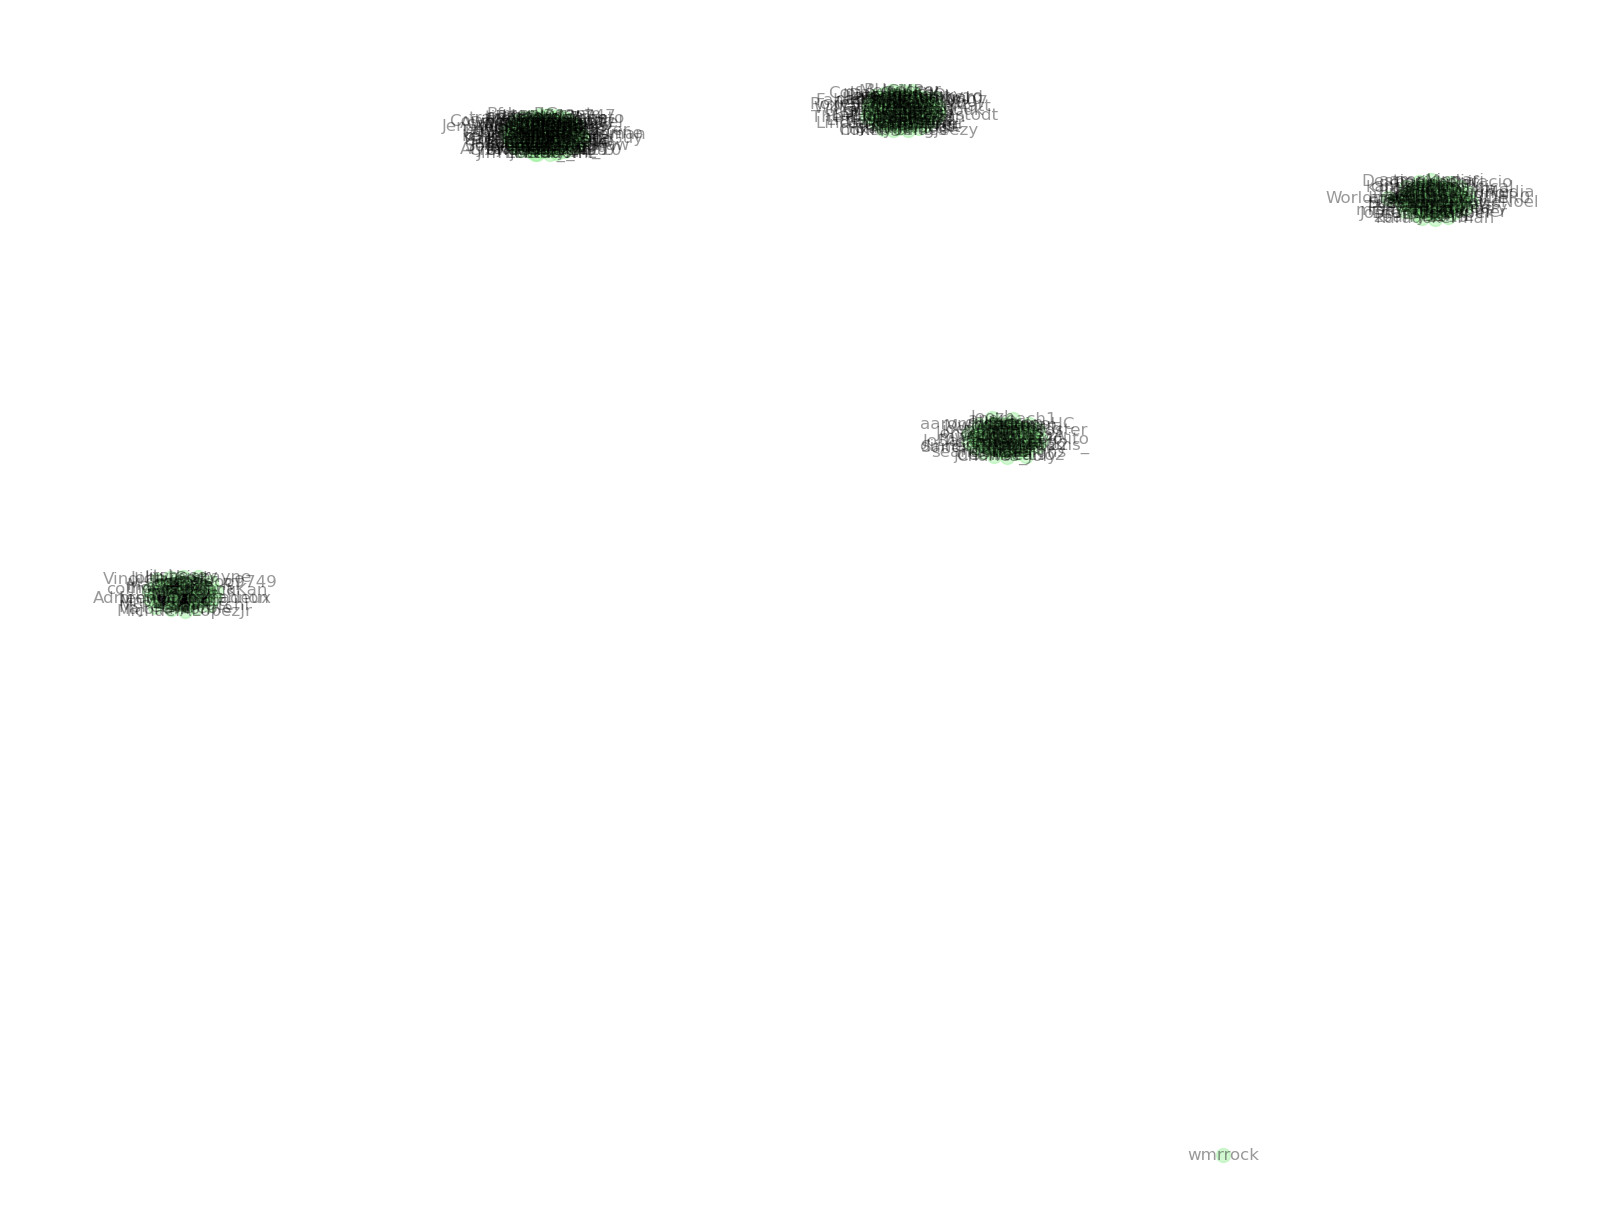

In [72]:
airline_graph = bipartite.projected_graph(airline_bipart, user_list, multigraph=True)

pos=nx.spring_layout(airline_graph)

plt.figure(figsize=(16, 12))
nx.draw(airline_graph, pos=pos, node_size=100, with_labels = True, node_color='lightgreen', alpha=0.4)
nx.draw_networkx_edges(airline_graph, pos=pos, alpha=0.1)

plt.show()

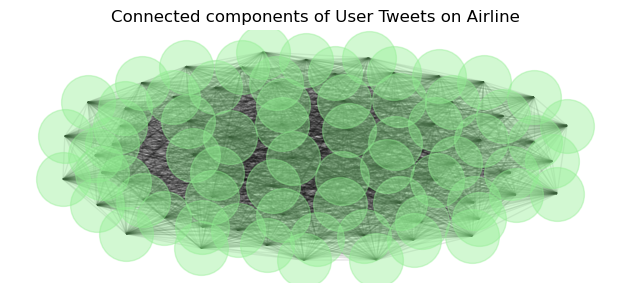

In [74]:
# Ranking of nodes regarding the number of degrees
degree_sequence = sorted([d for n, d in airline_graph.degree()], reverse=True)

# Extract connected nodes to visualize
Gcc = airline_graph.subgraph(sorted(nx.connected_components(airline_graph), key=len, reverse=True)[0])

# Visualization
fig = plt.figure("Degree of the avenger graph")
axgrid = fig.add_gridspec(5, 4)
ax0 = fig.add_subplot(axgrid[0:3, :])
pos = nx.spring_layout(Gcc, seed=42)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=1500, alpha=0.4, node_color='lightgreen')
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.1)
ax0.set_title("Connected components of User Tweets on Airline")
ax0.set_axis_off()

fig.tight_layout()
plt.show()

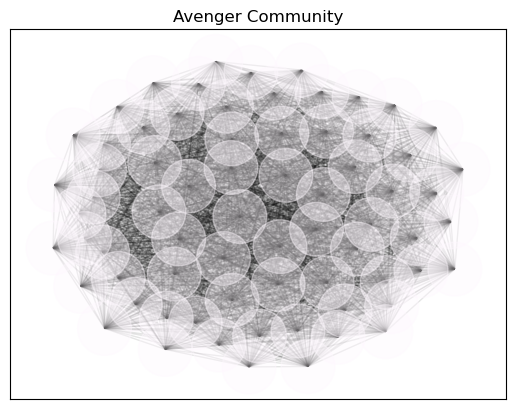

In [78]:
# Community division
partition_airline = community_louvain.best_partition(Gcc)

# Color the nodes according to community
cmap = cm.get_cmap('gist_ncar', max(partition_airline.values()) + 1)

pos = nx.spring_layout(Gcc, seed=42)
nx.draw_networkx_nodes(Gcc, pos, partition_airline.keys(), node_size=1500, alpha=0.4,
                       cmap=cmap, node_color=list(partition_airline.values()))
nx.draw_networkx_edges(Gcc, pos, alpha=0.1)
plt.title("Avenger Community")
plt.show()

In [79]:
# find the modularity
airline_modularity = nx_comm.modularity(airline_graph, nx_comm.label_propagation_communities(airline_graph))
print(f'Modularity of Hero network: {airline_modularity}')

Modularity of Hero network: 0.6633226603984038
